In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("MIMIC_Data_small.csv")

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
0,14.369565,16.0,37.049383,95.0,79.525000,140.0,1
1,15.320000,13.0,36.653534,94.0,66.000000,140.0,0
2,15.404762,18.0,36.545714,95.0,54.500000,143.0,0
3,16.677419,13.0,37.033333,92.0,47.933333,141.0,0
4,22.241379,25.0,37.333334,89.0,48.428571,143.0,0
...,...,...,...,...,...,...,...
59721,19.068966,41.0,37.087037,87.0,43.391304,128.0,1
59722,23.742857,20.0,38.000000,91.0,53.322581,140.0,0
59723,12.000000,14.0,36.935185,92.0,99.850000,144.0,0
59724,14.909091,21.0,36.111111,93.0,60.833333,138.0,0


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_train["hospital_expire_flag"].sum()

5150

In [15]:
len(y_train)

47780

In [16]:
5150/47780

0.1077856843867727

Nearly 11% of patients died in ICU. 

In [18]:
lm1 = LogisticRegression()

In [20]:
lm1.fit(X_train, y_train)

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [35]:
X_train_resp = X_train[(X_train["resprate_mean"] >= 30) & (X_train["resprate_mean"] <= 32)]



In [36]:
X_train_resp

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max
57791,31.255814,20.0,38.538889,53.0,47.472222,138.0
37368,30.619048,7.0,37.291667,90.0,50.800000,147.0
15984,30.857143,29.0,37.507936,96.0,80.107143,143.0
3486,31.791667,44.0,37.333334,92.0,59.285714,136.0
24738,30.882353,18.0,37.651515,97.0,54.909091,143.0
...,...,...,...,...,...,...
6801,30.333333,18.0,37.000000,94.0,62.347826,140.0
23714,30.541667,27.0,36.561111,91.0,69.560000,137.0
54401,31.064516,26.0,37.083333,95.0,55.193548,137.0
35773,30.038462,10.0,35.857143,91.0,73.807692,135.0


In [38]:
df2 = pd.concat([X_train, y_train], axis=1)

In [39]:
df2

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
5685,18.290323,9.0,37.456444,94.0,54.666667,140.0,0
32944,18.178571,17.0,36.787037,93.0,59.631579,142.0,0
43784,24.291667,38.0,36.677778,96.0,56.869565,141.0,0
6956,14.789474,26.0,36.222222,88.0,64.550000,145.0,0
3296,27.636364,25.0,38.658730,93.0,70.150000,133.0,0
...,...,...,...,...,...,...,...
54343,20.260870,33.0,37.048611,97.0,50.291667,139.0,0
38158,12.400000,24.0,36.611111,98.0,57.343750,138.0,0
860,21.920000,15.0,36.548611,97.0,77.217391,141.0,0
15795,24.875000,24.0,36.955555,92.0,50.041667,139.0,0


In [40]:
df2_resp = df2[(df2["resprate_mean"] >= 30) & (df2["resprate_mean"] <= 32)]


In [41]:
df2_resp

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max,hospital_expire_flag
57791,31.255814,20.0,38.538889,53.0,47.472222,138.0,1
37368,30.619048,7.0,37.291667,90.0,50.800000,147.0,0
15984,30.857143,29.0,37.507936,96.0,80.107143,143.0,0
3486,31.791667,44.0,37.333334,92.0,59.285714,136.0,0
24738,30.882353,18.0,37.651515,97.0,54.909091,143.0,0
...,...,...,...,...,...,...,...
6801,30.333333,18.0,37.000000,94.0,62.347826,140.0,0
23714,30.541667,27.0,36.561111,91.0,69.560000,137.0,1
54401,31.064516,26.0,37.083333,95.0,55.193548,137.0,0
35773,30.038462,10.0,35.857143,91.0,73.807692,135.0,0


In [44]:
df2_resp["hospital_expire_flag"].sum()/len(df2_resp)

0.3746130030959752

In [45]:
df3_resp = df2[(df2["resprate_mean"] >= 16) & (df2["resprate_mean"] <= 18)]
df3_resp["hospital_expire_flag"].sum()/len(df3_resp)

0.08202212973302203

In [46]:
df4_resp = df2[(df2["resprate_mean"] >= 6) & (df2["resprate_mean"] <= 12)]
df4_resp["hospital_expire_flag"].sum()/len(df3_resp)

0.005380164450309613

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


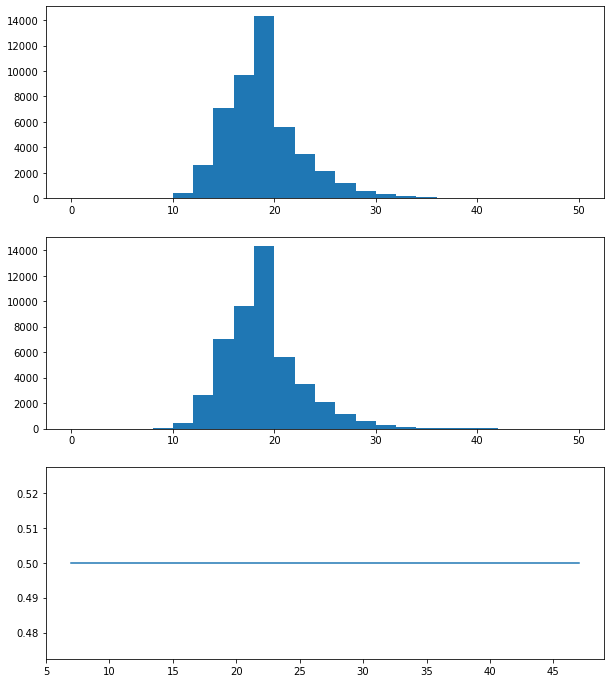

In [61]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'resprate_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'resprate_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

In [59]:
(y_train==0).index

Int64Index([ 5685, 32944, 43784,  6956,  3296,   523, 37640,  7962, 14174,
            41644,
            ...
            16850,  6265, 54886, 11284, 44732, 54343, 38158,   860, 15795,
            56422],
           dtype='int64', length=47780)

In [60]:
X_train.loc[(y_train==0).index]

,resprate_mean,bun_min,tempc_mean,spo2_min,diasbp_mean,sodium_max
5685,18.290323,9.0,37.456444,94.0,54.666667,140.0
32944,18.178571,17.0,36.787037,93.0,59.631579,142.0
43784,24.291667,38.0,36.677778,96.0,56.869565,141.0
6956,14.789474,26.0,36.222222,88.0,64.550000,145.0
3296,27.636364,25.0,38.658730,93.0,70.150000,133.0
...,...,...,...,...,...,...
54343,20.260870,33.0,37.048611,97.0,50.291667,139.0
38158,12.400000,24.0,36.611111,98.0,57.343750,138.0
860,21.920000,15.0,36.548611,97.0,77.217391,141.0
15795,24.875000,24.0,36.955555,92.0,50.041667,139.0


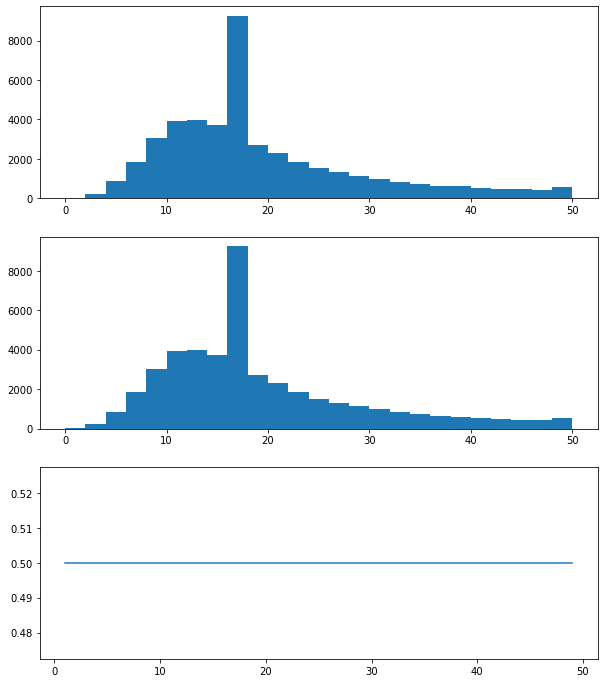

In [62]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'bun_min'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'bun_min'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


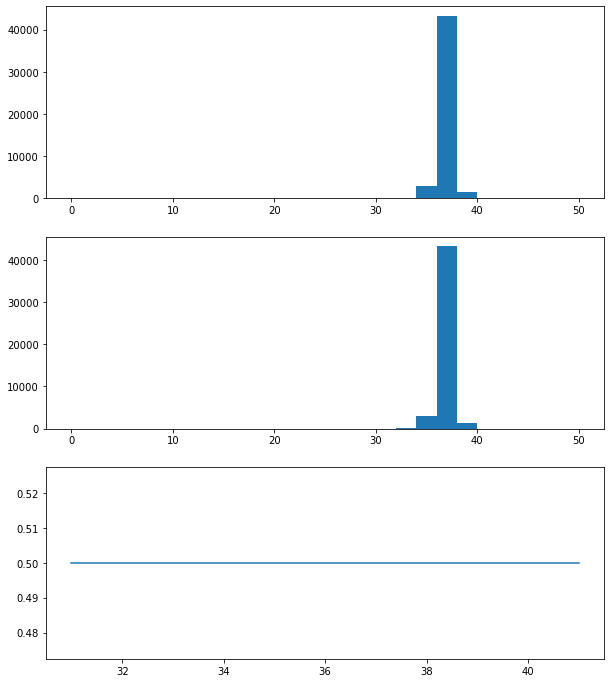

In [63]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'tempc_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'tempc_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

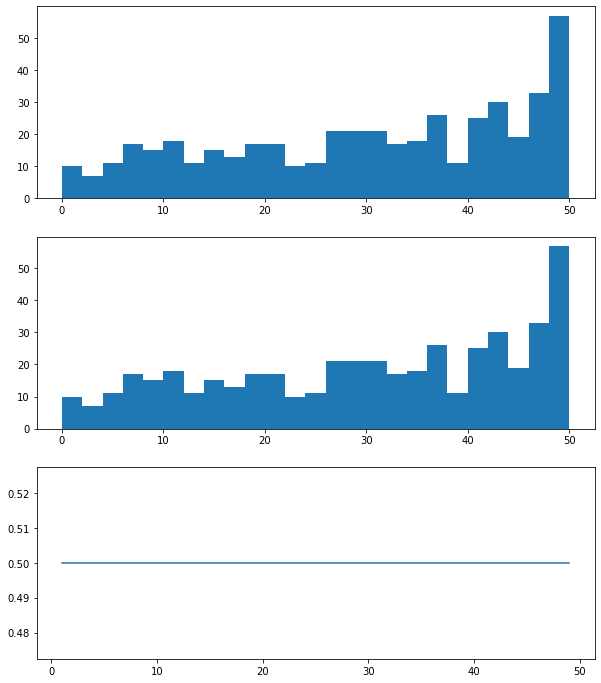

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'spo2_min'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'spo2_min'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


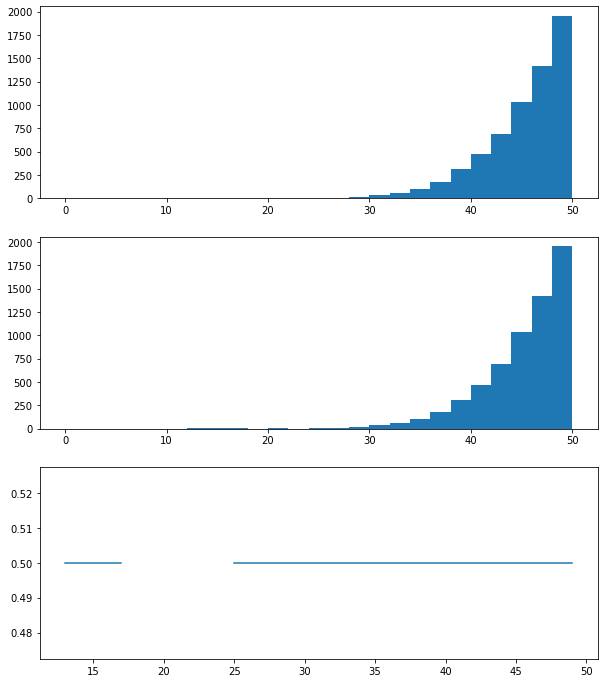

In [65]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'diasbp_mean'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'diasbp_mean'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


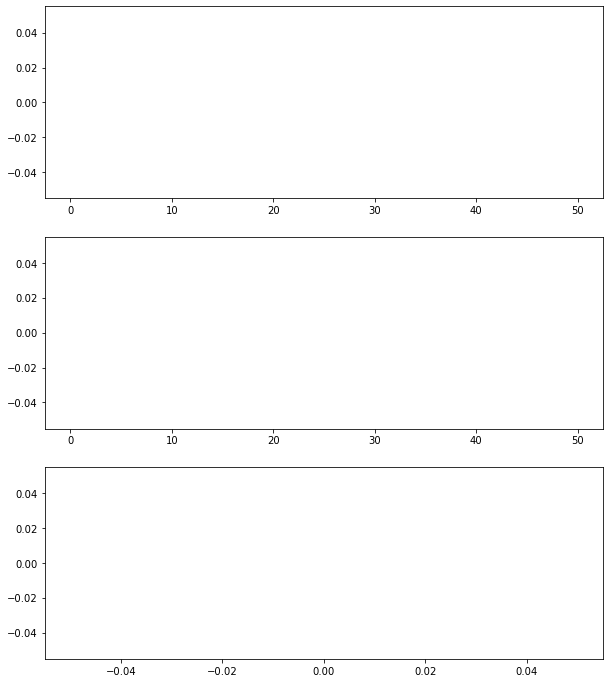

In [66]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0).index,'sodium_max'], bins=25, range=(0,50))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1).index,'sodium_max'], bins=25, range=(0,50))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))